In [ ]:
#By Colab
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/My Drive/Data/"

df = pd.read_csv(path + 'cross_sell_train.csv',na_values=["-1"])
df

Mounted at /content/drive


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

0    334399
1     46710
Name: Response, dtype: int64

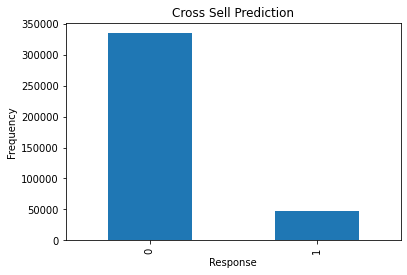

In [ ]:
import matplotlib.pyplot as plt

pd.value_counts(df['Response']).plot.bar()
plt.title('Cross Sell Prediction')
plt.xlabel('Response')
plt.ylabel('Frequency')
df['Response'].value_counts()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df_1 = df

In [ ]:
df_1['Gender_Code'] = pd.CategoricalIndex(df_1['Gender']).codes
df_1['Vehicle_Age_Code'] = pd.CategoricalIndex(df_1['Vehicle_Age']).codes
df_1['Vehicle_Damage_Code'] = pd.CategoricalIndex(df_1['Vehicle_Damage']).codes

In [ ]:
df_1.drop(["Gender","Vehicle_Age","Vehicle_Damage"], axis = 1, inplace=True)
df_1

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Code,Vehicle_Age_Code,Vehicle_Damage_Code
0,1,44,1,28.0,0,40454.0,26.0,217,1,1,2,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,1,2,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0,1,0,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0,1,1,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0,1,1,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0,0,2,1


In [ ]:
df_1.drop(["Gender","Vehicle_Age","Vehicle_Damage"], axis = 1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
feature = df_1[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
                   'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Gender_Code',
                   'Vehicle_Age_Code', 'Vehicle_Damage_Code']]

scaler = StandardScaler()

for param in ['Age',
              'Driving_License',
              'Region_Code',
              'Previously_Insured',
              'Annual_Premium',
              'Policy_Sales_Channel',
              'Vintage',
              'Gender_Code',
              'Vehicle_Age_Code',
              'Vehicle_Damage_Code']:
    feature[param] = scaler.fit_transform(feature[param].values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(feature, df_1['Response'], test_size = 0.2, shuffle = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (304887, 10)
Number transactions y_train dataset:  (304887,)
Number transactions X_test dataset:  (76222, 10)
Number transactions y_test dataset:  (76222,)


In [ ]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 37370
Before OverSampling, counts of label '0': 267517 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (535034, 10)
After OverSampling, the shape of train_y: (535034,) 

After OverSampling, counts of label '1': 267517
After OverSampling, counts of label '0': 267517


In [ ]:
y_train_res

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
X_test

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Code,Vehicle_Age_Code,Vehicle_Damage_Code
188787,-0.762177,0.046208,-1.012013,1.087384,-0.002521,0.884912,-0.302941,0.921545,0.837139,-1.009801
54273,-0.439838,0.046208,-0.785254,-0.919638,-0.943082,0.220753,0.951972,0.921545,-0.893873,-1.009801
13635,-0.504306,0.046208,1.104409,1.087384,-0.216369,0.737321,-0.948324,0.921545,0.837139,-1.009801
228511,0.333777,0.046208,-0.104975,1.087384,-0.550416,0.220753,1.418082,-1.085134,-0.893873,-1.009801
102209,-0.826645,0.046208,0.272958,1.087384,0.415184,0.737321,0.246831,0.921545,0.837139,-1.009801
...,...,...,...,...,...,...,...,...,...,...
218080,-1.084517,0.046208,1.482342,1.087384,0.031233,0.737321,0.677086,0.921545,0.837139,-1.009801
52461,-0.053030,0.046208,0.121784,1.087384,0.826556,0.220753,0.689038,0.921545,-0.893873,-1.009801
69833,-1.148985,0.046208,1.784688,1.087384,0.446671,0.737321,0.342443,0.921545,0.837139,-1.009801
308560,-0.891113,0.046208,-0.860840,1.087384,0.966797,0.737321,-1.665417,-1.085134,0.837139,-1.009801


In [ ]:
X_train_res

array([[ 0.7205848 ,  0.04620794, -0.48290777, ..., -1.08513449,
        -0.89387314,  0.99029399],
       [ 0.46271311,  0.04620794,  0.19737098, ...,  0.92154476,
         2.5681502 ,  0.99029399],
       [-0.95558114,  0.04620794,  0.19737098, ...,  0.92154476,
         0.83713853, -1.00980114],
       ...,
       [-0.09639403,  0.04620794, -0.71034474, ...,  0.92154476,
        -0.89387314,  0.99029399],
       [ 0.54527162,  0.04620794,  0.12178446, ...,  0.92154476,
         2.5681502 ,  0.99029399],
       [ 0.40410435,  0.04620794,  0.12178446, ..., -1.08513449,
        -0.89387314,  0.99029399]])

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train_res, y_train_res)
preds = model.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, preds))

Accuracy:  0.7145312377004015


In [ ]:
model = XGBClassifier(silent=False,
                      scale_pos_weight=1,
                      learning_rate=0.01,
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic',
                      n_estimators=1000,
                      reg_alpha = 0.3,
                      max_depth=4,
                      gamma=10)
model.fit(X_train_res, y_train_res)
preds = model.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, preds))

In [ ]:
from sklearn.model_selection import GridSearchCV
def hyperParameterTuning(X_train_res, y_train_res):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train_res, y_train_res)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_train_res, y_train_res)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 84.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 222.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 253.3min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [ ]:
from sklearn.metrics import classification_report
model = XGBClassifier(learning_rate=0.1,
                      colsample_bytree = 0.7,
                      subsample = 0.5,
                      min_child_weight = 1,
                      objective='reg:squarederror',
                      n_estimators=100,
                      max_depth=10)
model.fit(X_train_res, y_train_res)
preds = model.predict(X_test.values)
print('Accuracy: ', accuracy_score(y_test, preds))

Accuracy:  0.8142924614940569
